In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

nltk.download('stopwords')
nltk.download('punkt')
import sys
import scipy.cluster.hierarchy as shc

import math
rc = {
    "axes.facecolor": "#E6FFE6",
    "figure.facecolor": "#E6FFE6",
    "axes.edgecolor": "#000000",
    "grid.color": "#EBEBE7",
    "font.family": "serif",
    "axes.labelcolor": "#000000",
    "xtick.color": "#000000",
    "ytick.color": "#000000",
    "grid.alpha": 0.4
}

sns.set(rc=rc)

from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [1]:
!pip install nltk

In [2]:
!pip install colorama

In [ ]:
df = pd.read_csv('/content/PRDECT-ID Dataset.csv')
df.head(10)

##Cleaning

In [5]:
print(f'\033[94mNumber of records (rows) in the dataset are: {df.shape[0]}')
print(f'\033[94mNumber of features (columns) in the dataset are: {df.shape[1]}')
print(f'\033[94mNumber of duplicate entries in the dataset are: {df.duplicated().sum()}')
print(f'\033[94mNumber missing values in the dataset are: {sum(df.isna().sum())}')

Number of records (rows) in the dataset are: 5400
Number of features (columns) in the dataset are: 11
Number of duplicate entries in the dataset are: 7
Number missing values in the dataset are: 0


In [6]:
df.dropna(subset=['Customer Review'], inplace=True)

In [7]:
# Removing duplicates
df.drop_duplicates(subset=['Customer Review'], keep='first', inplace=True)

In [8]:
df.drop(['Location', 'Price', 'Number Sold'], axis=1, inplace=True)

In [9]:
df.describe().style.background_gradient(cmap='tab20c')

,Overall Rating,Total Review,Customer Rating
count,5305.000000,5305.000000,5305.000000
mean,4.854288,2158.940245,3.101791
std,0.108556,2912.542848,1.762642
min,4.100000,4.000000,1.000000
25%,4.800000,574.000000,1.000000
50%,4.900000,1188.000000,3.000000
75%,4.900000,2561.000000,5.000000
max,5.000000,24500.000000,5.000000


##Text Normalization

1. Lowercasing
2. Removing special characters
3. Removing stopwords

In [10]:
# 1. Lowercasing
df['Customer Review'] = df['Customer Review'].str.lower()

In [11]:
df['Customer Review'] = df['Customer Review'].str.replace('[^\w\s]', '')

In [12]:
# 3. Removing stopwords
stop_words = set(stopwords.words('indonesian'))
df['Customer Review'] = df['Customer Review'].apply(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stop_words))


#Explore Data

##Word Frequency Analysis

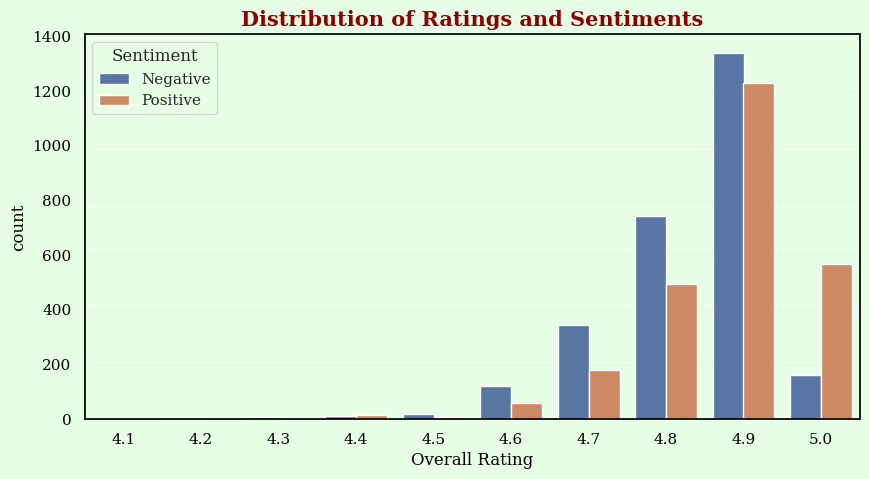

In [13]:
# A. Distribution of Ratings and Sentiments
plt.figure(figsize=(10, 5))
sns.countplot(x='Overall Rating', hue='Sentiment', data=df)
plt.title('Distribution of Ratings and Sentiments', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Distribution of Ratings and Sentiments.png')
plt.show()

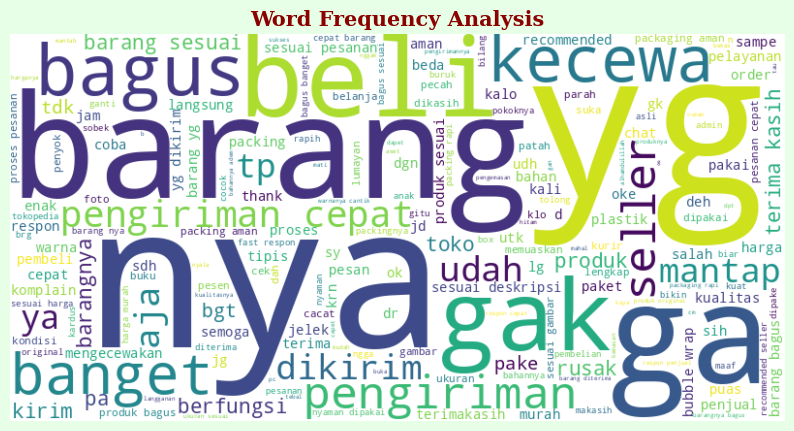

In [14]:
# B. Word Frequency Analysis
reviews = ' '.join(df['Customer Review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(reviews)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Frequency Analysis', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Word Frequency Analysis.png')
plt.show()

#Sentiment Analysis

In [15]:
# 1. Using Customer Rating
df['Sentiment (Using Rating)'] = df['Overall Rating'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

In [16]:
# 2. Using Customer Review Text (Example: Using a simple sentiment analysis library like TextBlob)
from textblob import TextBlob
df['Sentiment (Using TextBlob)'] = df['Customer Review'].apply(lambda x: 'Positive' if TextBlob(x).sentiment.polarity > 0 else 'Negative')

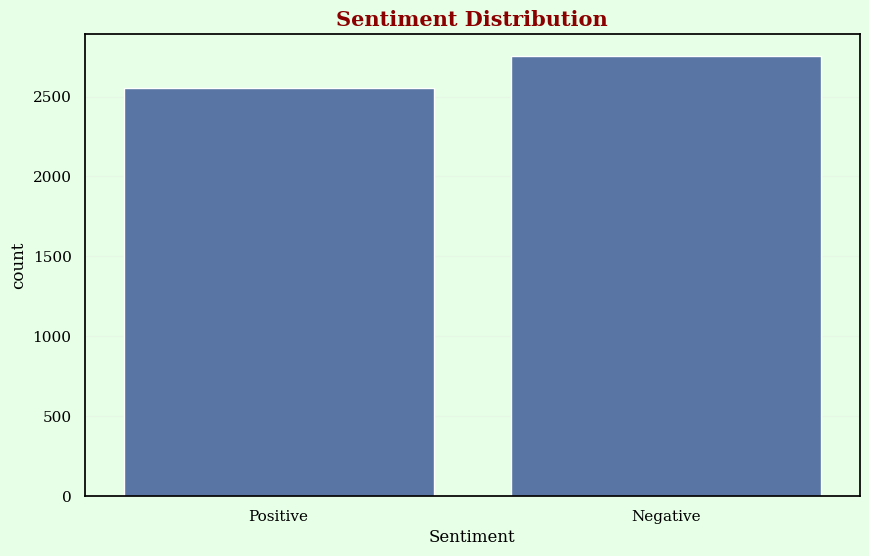

In [17]:
# B. Sentiment Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df)
plt.title('Sentiment Distribution', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Sentiment Distribution.png')
plt.show()

#Emotion Analysis

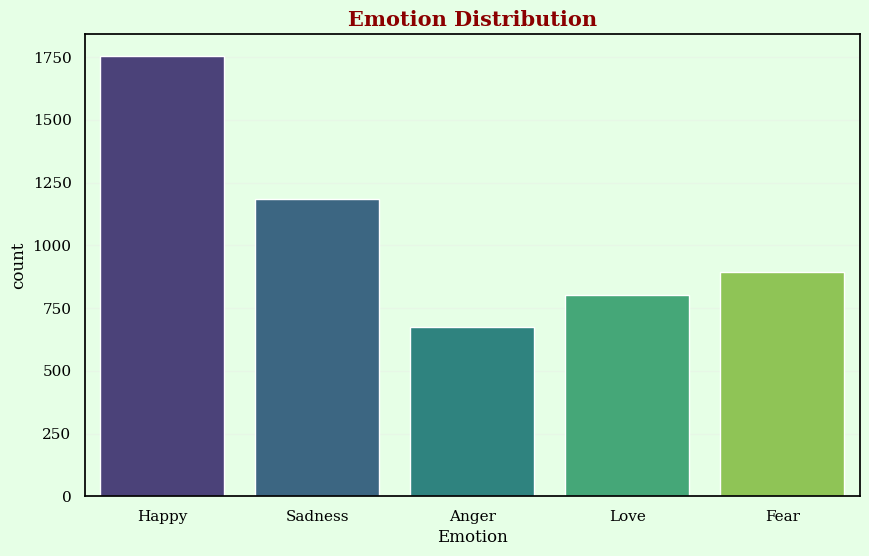

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion', data=df, palette='viridis')  # You can choose any palette you like
plt.title('Emotion Distribution', fontsize=15, fontweight='bold', color='darkred')
plt.savefig('Emotion Distribution.png')
plt.show()

In [19]:
# C. Emotion Analysis Techniques (Rule-based approach using predefined emotion keywords)
happy_keywords = ['love', 'happy', 'joy', 'excited']
sad_keywords = ['sad', 'disappointed', 'unhappy', 'regret']
neutral_keywords = ['neutral', 'okay', 'fine']

def classify_emotion(text):
    if any(word in text for word in happy_keywords):
        return 'Happy'
    elif any(word in text for word in sad_keywords):
        return 'Sad'
    elif any(word in text for word in neutral_keywords):
        return 'Neutral'
    else:
        return 'Other'

df['Emotion (Rule-based)'] = df['Customer Review'].apply(classify_emotion)

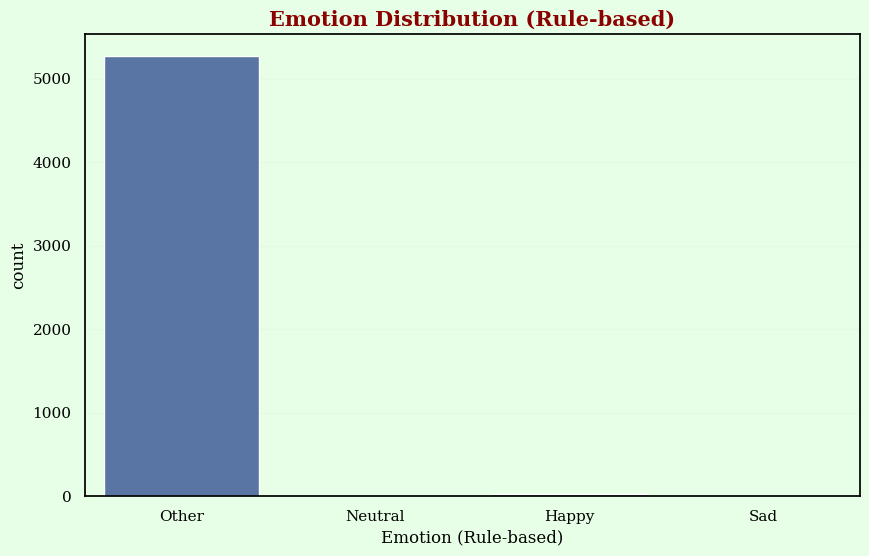

In [20]:
# D. Evaluation Metrics

# Additional visualization for Emotion Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='Emotion (Rule-based)', data=df)
plt.title('Emotion Distribution (Rule-based)', fontsize = 15, fontweight = 'bold', color = 'darkred')
plt.savefig('Emotion Distribution (Rule-based).png')
plt.show()

##Customer Segmentation Using K-Means and Hierarchical Clustering

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

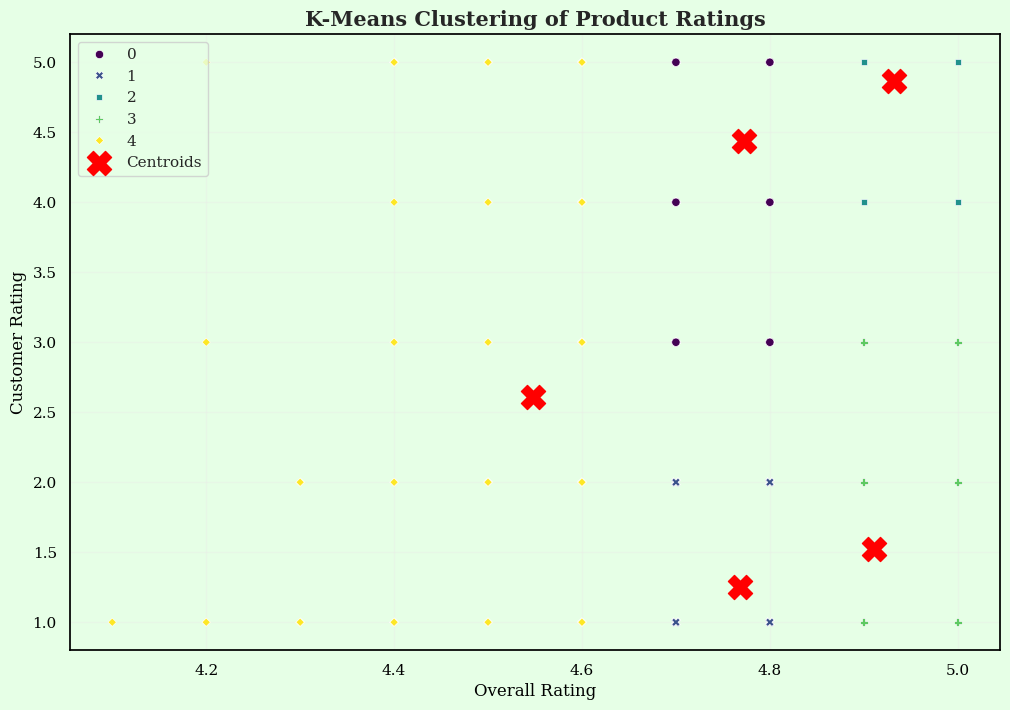

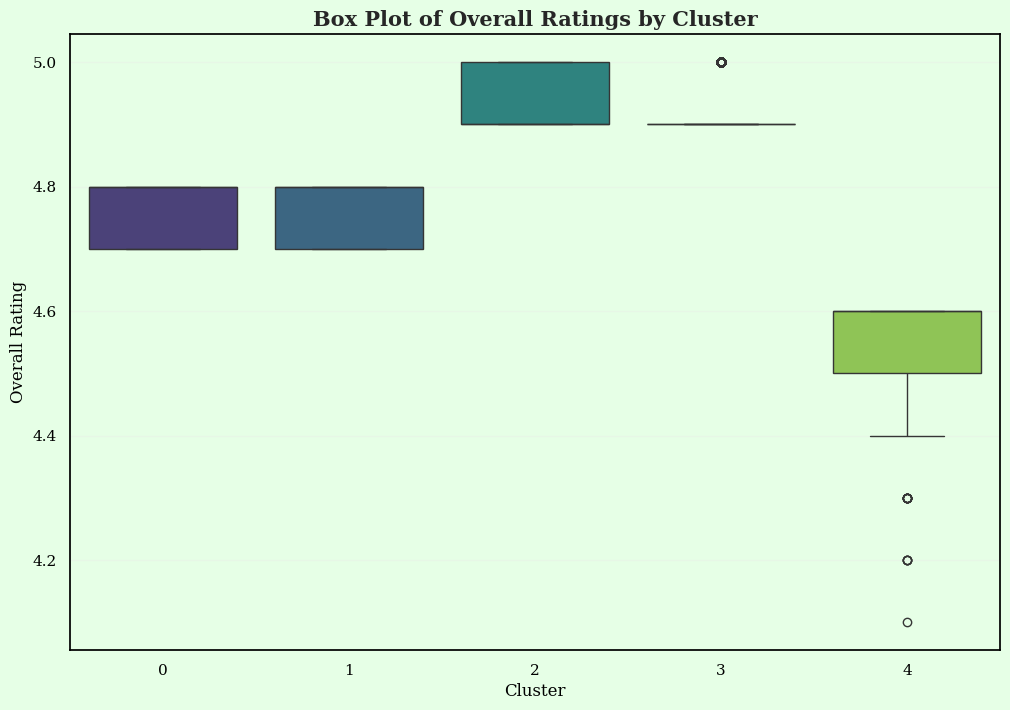

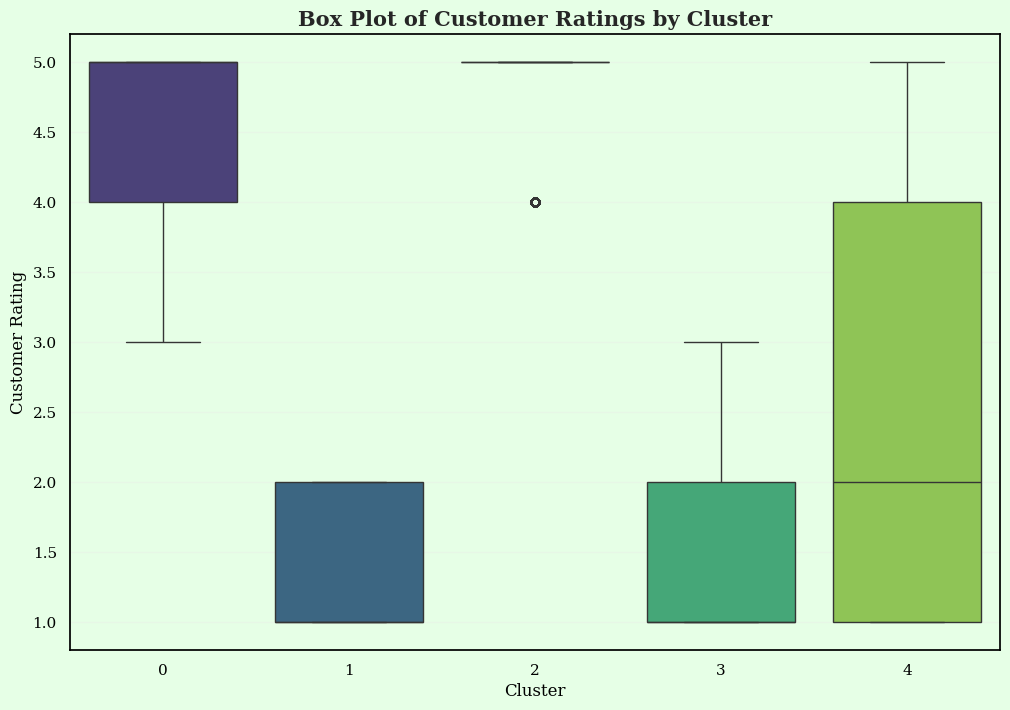

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


# Standardize the features
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df[['Overall Rating', 'Customer Rating']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=0)
y_kmeans = kmeans.fit_predict(df_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = y_kmeans

# Scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Overall Rating', y='Customer Rating', hue='Cluster', data=df, palette='viridis', style='Cluster')
plt.title('K-Means Clustering of Product Ratings', fontsize=15, fontweight='bold')
plt.xlabel('Overall Rating')
plt.ylabel('Customer Rating')

# Plot centroids
centroids = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids)
plt.scatter(centroids[:, 0], centroids[:, 1], s=300, c='red', label='Centroids', marker='X')
plt.legend()
plt.show()

# Box plot for 'Overall Rating'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Overall Rating', data=df, palette='viridis')
plt.title('Box Plot of Overall Ratings by Cluster', fontsize=15, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Overall Rating')
plt.show()

# Box plot for 'Customer Rating'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Cluster', y='Customer Rating', data=df, palette='viridis')
plt.title('Box Plot of Customer Ratings by Cluster', fontsize=15, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Customer Rating')
plt.show()

In [ ]:
# Menambahkan hasil kluster ke dalam DataFrame asli
df['Cluster'] = y_kmeans

# Menghitung statistik deskriptif untuk setiap kluster
cluster_stats = df.groupby('Cluster').agg({
    'Overall Rating': ['mean', 'median', 'min', 'max', 'std'],
    'Customer Rating': ['mean', 'median', 'min', 'max', 'std']
}).reset_index()

print(cluster_stats)

  Cluster Overall Rating                            Customer Rating         \
                    mean median  min  max       std            mean median   
0       0       4.768165    4.8  4.7  4.8  0.046605        1.521101    1.0   
1       1       4.931882    4.9  4.9  5.0  0.046615        4.869418    5.0   
2       2       4.539336    4.6  4.1  4.6  0.103360        2.189573    2.0   
3       3       4.910791    4.9  4.9  5.0  0.031037        1.523872    1.0   
4       4       4.764589    4.8  4.6  4.8  0.057793        4.803116    5.0   

                     
  min max       std  
0   1   3  0.745981  
1   4   5  0.337038  
2   1   5  1.335267  
3   1   3  0.771455  
4   4   5  0.397926  


In [ ]:
## Creating a New Dataframe with an appended cluster column

df_Kmeans = df.copy()
df_Kmeans['Cluster'] = y_kmeans
print(df_Kmeans.head(5))

                Category                                       Product Name  \
0  Computers and Laptops  Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...   
1  Computers and Laptops  PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...   
2  Computers and Laptops                SSD Midasforce 128 Gb - Tanpa Caddy   
3  Computers and Laptops  ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
4  Computers and Laptops  ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   

   Overall Rating  Total Review  Customer Rating  \
0             4.9          2369                5   
1             4.9          1044                5   
2             5.0          3573                5   
3             4.7           672                5   
4             4.7           672                5   

                                     Customer Review Sentiment Emotion  \
0  alhamdulillah berfungsi . packaging aman . res...  Positive   Happy   
1    barang bagus respon cepat , harga bersaing yg .  Positive  

Cluster
0    1090
1    1769
2     211
3    1529
4     706
Name: count, dtype: int64


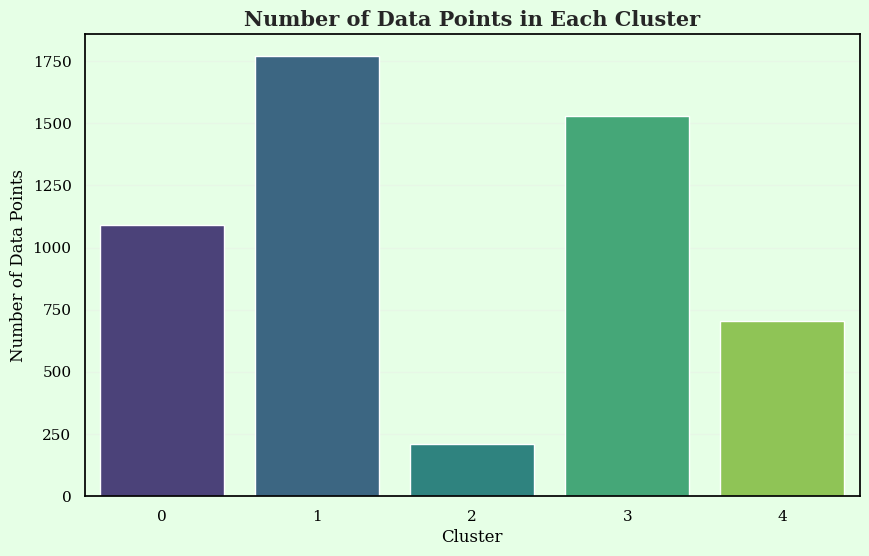

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menghitung jumlah data dalam masing-masing kluster
cluster_counts = df['Cluster'].value_counts().sort_index()

# Menampilkan jumlah data dalam masing-masing kluster
print(cluster_counts)

# Bar plot untuk jumlah data dalam masing-masing kluster
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Number of Data Points in Each Cluster', fontsize=15, fontweight='bold')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

X = df[['Overall Rating', 'Customer Rating']]


scaler = StandardScaler()
X_kmeans = scaler.fit_transform(X)


clusters = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = clusters.fit_predict(X_kmeans)

# Menambahkan hasil kluster ke dalam DataFrame asli
df['Cluster'] = y_kmeans

# Memastikan kolom 'Cluster' sudah ditambahkan ke DataFrame
print(df.head())

# Memisahkan anggota dari setiap kluster
cluster_0 = df[df['Cluster'] == 0]
cluster_1 = df[df['Cluster'] == 1]
cluster_2 = df[df['Cluster'] == 2]
cluster_3 = df[df['Cluster'] == 3]
cluster_4 = df[df['Cluster'] == 4]

# Menampilkan beberapa baris dari setiap kluster
print("Cluster 0:")
print(cluster_0.head(), "\n")

print("Cluster 1:")
print(cluster_1.head(), "\n")

print("Cluster 2:")
print(cluster_2.head(), "\n")

print("Cluster 3:")
print(cluster_3.head(), "\n")

print("Cluster 4:")
print(cluster_4.head(), "\n")

# Menyimpan anggota setiap kluster ke file CSV
cluster_0.to_csv('cluster_0.csv', index=False)
cluster_1.to_csv('cluster_1.csv', index=False)
cluster_2.to_csv('cluster_2.csv', index=False)
cluster_3.to_csv('cluster_3.csv', index=False)
cluster_4.to_csv('cluster_4.csv', index=False)


                Category                                       Product Name  \
0  Computers and Laptops  Wireless Keyboard i8 Mini TouchPad Mouse 2.4G ...   
1  Computers and Laptops  PAKET LISENSI WINDOWS 10 PRO DAN OFFICE 2019 O...   
2  Computers and Laptops                SSD Midasforce 128 Gb - Tanpa Caddy   
3  Computers and Laptops  ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   
4  Computers and Laptops  ADAPTOR CHARGER MONITOR LCD LED TV LG merek LG...   

                 Location   Price  Overall Rating  Number Sold  Total Review  \
0           Jakarta Utara   53500             4.9         5449          2369   
1  Kota Tangerang Selatan   72000             4.9         2359          1044   
2           Jakarta Barat  213000             5.0        12300          3573   
3           Jakarta Timur   55000             4.7         2030           672   
4           Jakarta Timur   55000             4.7         2030           672   

   Customer Rating                          